# EXPLORATORY DATA ANALYSIS 

## 1. Load Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar as cal
import logging
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar as cal
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Define standard logging configuration
logging.basicConfig(
    level=logging.INFO,
    filename='../logs/onlineretail.log')

## 2. Load File

In [96]:
try:
    df = pd.read_csv('../data/interim/online_retail_cleaned.csv')
    df.head()

except OSError as e:
    logging.error(e)

## 3. Define Global Functions

In [97]:
ChangeLogs = {}
def log_changes(num, desc):
    '''Custom function to update ChangeLogs{} dictionary with the number of changed records and the description of the changes.
    Input:
        num - number of changed records to track
        desc - free text description of the changes
    Return: None
    '''
    idx = len(ChangeLogs)
    ChangeLogs[idx] = {'Number': num, 'Description': desc}

## 4. Explore Data

In [98]:
display(df.head())

log_changes(df.shape[0], 'Row count before EDA process')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392733 entries, 0 to 392732
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      392733 non-null  int64  
 1   StockCode    392733 non-null  object 
 2   Description  392733 non-null  object 
 3   Quantity     392733 non-null  int64  
 4   InvoiceDate  392733 non-null  object 
 5   Price        392733 non-null  float64
 6   CustomerID   392733 non-null  int64  
 7   Country      392733 non-null  object 
 8   Month        392733 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 27.0+ MB


**Dealing with Price**

In [100]:
display(df.describe())

rec_init = df.shape[0]
print('0 price in the dataset: ',  np.sum(df.Price <= 0))


,Invoice,Quantity,Price,CustomerID,Month
count,392733.000000,392733.000000,392733.000000,392733.000000,392733.000000
mean,560591.125897,13.153687,3.125633,15287.728182,7.601946
std,13087.142969,181.588189,22.240710,1713.570644,3.415026
min,536365.000000,1.000000,0.000000,12346.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,5.000000
50%,561874.000000,6.000000,1.950000,15150.000000,8.000000
75%,572061.000000,12.000000,3.750000,16791.000000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,12.000000


0 price in the dataset:  40


Minimum in price is 0, and there's 40 records of it.\
Remove the rows from the dataset as it will impact the monetary component in the analysis.

In [101]:
df = df.query('Price > 0')

print('0 price in the dataset after changes: ',  np.sum(df.Price <= 0))
log_changes(-(rec_init - df.shape[0]), 'Records with 0 price dropped')

df['Price'].describe()

0 price in the dataset after changes:  0


count    392693.000000
mean          3.125952
std          22.241820
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Price, dtype: float64

**Inspect Invoice Date**

Transform InvoiceDate column type and check the range 

In [102]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()

print(min(df['InvoiceDate'].dt.date), '::', max(df['InvoiceDate'].dt.date))

2010-12-01 :: 2011-12-09


Filter dataset to only include dates later than 2011-01-01

In [103]:
rec_init = df.shape[0]
df  = df[df['InvoiceDate'] >= '2011-01-01']


log_changes( -(rec_init - df.shape[0]), 'Out of date range records dropped')

**Create Sales column**

In [104]:
#Create Sales column (Useful for RFM Analysis later)
df['Sales'] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Sales
25673,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,13313,United Kingdom,1,19.5
25674,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
25675,539993,21498,RED RETROSPOT WRAP,25,2011-01-04,0.42,13313,United Kingdom,1,10.5
25676,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,13313,United Kingdom,1,10.5
25677,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,13313,United Kingdom,1,12.5


In [105]:
df.shape

(367023, 10)

### 4.1 Summary Statistics

In [106]:
df.describe( include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,Sales
count,367023.000000,367023,367023,367023.000000,367023,367023.000000,367023.000000,367023,367023.000000,367023.000000
unique,NaN,3596,3784,NaN,NaN,NaN,NaN,36,NaN,NaN
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN
freq,NaN,1816,1809,NaN,NaN,NaN,NaN,325745,NaN,NaN
mean,562169.933830,NaN,NaN,13.189786,2011-07-25 03:02:48.816668416,3.124763,15271.672315,NaN,7.294273,22.660172
min,539993.000000,NaN,NaN,1.000000,2011-01-04 00:00:00,0.001000,12346.000000,NaN,1.000000,0.001000
25%,551776.000000,NaN,NaN,2.000000,2011-05-04 00:00:00,1.250000,13924.000000,NaN,5.000000,4.950000
50%,563246.000000,NaN,NaN,6.000000,2011-08-15 00:00:00,1.850000,15116.000000,NaN,8.000000,12.480000
75%,572652.000000,NaN,NaN,12.000000,2011-10-25 00:00:00,3.750000,16771.000000,NaN,10.000000,19.800000
max,581587.000000,NaN,NaN,80995.000000,2011-12-09 00:00:00,8142.750000,18287.000000,NaN,12.000000,168469.600000


In [107]:
#Summary statistics for Sales Column
df.Sales.describe()

count    367023.000000
mean         22.660172
std         321.143989
min           0.001000
25%           4.950000
50%          12.480000
75%          19.800000
max      168469.600000
Name: Sales, dtype: float64

**Evaluate Categorical Variables**

In [108]:
#Evaluate categorical variables

print('Unique Invoices: ', df.Invoice.nunique())
print('Unique Countries: ', df.Country.nunique())
print('Unique StockCodes: ', df.StockCode.nunique())
print('Unique Customer IDs: ', df.CustomerID.nunique())

Unique Invoices:  17132
Unique Countries:  36
Unique StockCodes:  3596
Unique Customer IDs:  4219


**Extract Monthly Data**

Monthly Sales

In [109]:
ms = df.groupby('Month')['Sales'].agg(['mean', 'median', 'sum']).reset_index()
ms

,Month,mean,median,sum
0,1,27.067911,12.60,568101.310
1,2,22.637010,13.20,446084.920
2,3,22.109481,12.75,594081.760
3,4,20.878809,12.75,468374.331
4,5,24.128349,15.00,677355.150
5,6,24.513335,12.60,660046.050
6,7,22.534345,12.50,598962.901
7,8,24.040726,13.91,644051.040
8,9,23.965570,13.52,950690.202
9,10,21.225226,10.50,1035642.450


In [110]:
# mq - monthly quantities
mq = df.groupby('Month')['Quantity'].agg('sum').reset_index()
mq

,Month,Quantity
0,1,348473
1,2,265027
2,3,347582
3,4,291366
4,5,372864
5,6,363014
6,7,367360
7,8,397373
8,9,543652
9,10,591543


**Visualize monthly sales and sold items**

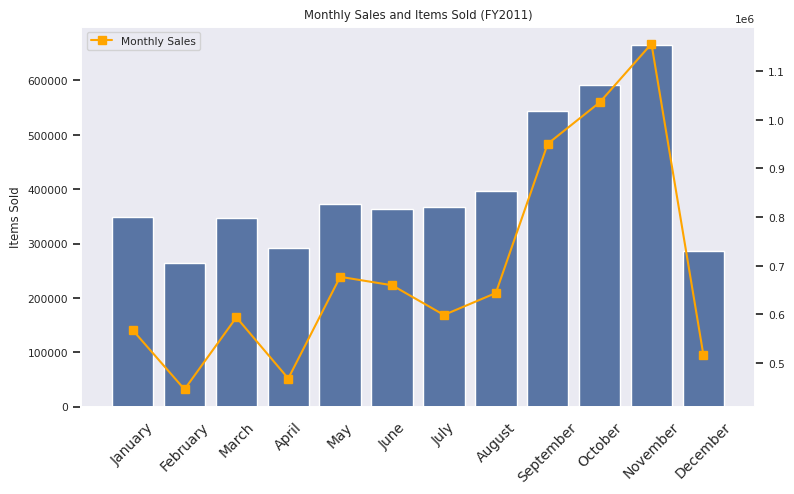

In [111]:
sns.set_style('dark')
plt.figure(figsize=(8,5))

# Primary axis for items sold monthly
ax = sns.barplot(data=mq, x=mq.Month, y=mq.Quantity)
ax.set_title('Monthly Sales and Items Sold (FY2011)')
ax.set_xticklabels([cal.month_name[i] for i in np.arange(1,13, 1)], rotation=45, size=10)
ax.set_xlabel('')
ax.set_ylabel('Items Sold')

# Secondayy axis for month-on-month sales
tx = ax.twinx()
tx.plot(ms['sum'], label='Monthly Sales', color='orange', marker='s',)
plt.legend()
plt.tight_layout()
plt.show()

Investigate the steep decline in sales for the month of December, which is unusual for the amount of Sales during this time of the year.

In [112]:
# Display range of sales values
print(df[df.Month==12].Sales.min(), '::', df[df.Month==12].Sales.max())

0.12 :: 168469.6


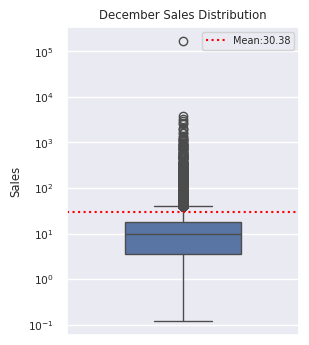

In [124]:
sns.set_style('darkgrid')
plt.figure(figsize=(3,4))
sns.boxplot(df[df.Month == 12]['Sales'], width=0.5)
plt.axhline(df[df.Month == 12]['Sales'].mean(), label='Mean:' + str(round(df[df.Month == 12]['Sales'].mean(),2)), linestyle=':', color='red')
plt.title('December Sales Distribution')
plt.legend(fontsize=7)
plt.yscale('log')
plt.show()

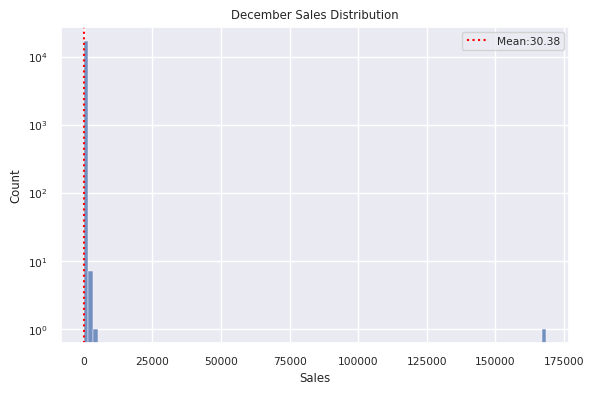

In [125]:
sns.set(font_scale=0.7, style='darkgrid')
plt.figure(figsize=(6,4))
sns.histplot(data=df[df.Month==12].Sales, bins=100)
plt.yscale('log')
plt.axvline(df[df.Month == 12]['Sales'].mean(), label='Mean:' + str(round(df[df.Month == 12]['Sales'].mean(),2)), linestyle=':', color='red')
plt.title('December Sales Distribution')
plt.legend()
plt.tight_layout()
plt.show()

In [115]:
print('No. of transaction (December): ', df.query('Month == 12').shape[0])
print('No. of transactions for the year: ', df.shape[0] )
print('% of December Transactions: ', round(len(df.query('Month == 12')) * 100 / len(df), 2), '%')

No. of transaction (December):  17027
No. of transactions for the year:  367023
% of December Transactions:  4.64 %


December transactions account for less than 5% of the whole year. Check daily transactions for this month.

In [116]:
df.query('Month == 12').groupby([(df.Month), (df.InvoiceDate.dt.day)])['Invoice'].count()

Month  InvoiceDate
12     1              2120
       2              1939
       4              1885
       5              3335
       6              2503
       7              2135
       8              2499
       9               611
Name: Invoice, dtype: int64

In [117]:
# Confirm the last transaction date in December. 
print('Latest December Transaction: ', df.query('Month == 12')['InvoiceDate'].dt.date.max() )

Latest December Transaction:  2011-12-09


The transactions in the dataset appear incomplete as it did not capture the whole transactions for the month of December 2011 (Last invoice date: Dec. 9)

In [118]:
# Display shape of new df after all changes prior to EDA
df.shape
log_changes(df.shape[0], 'Rows after EDA process')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367023 entries, 25673 to 392732
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      367023 non-null  int64         
 1   StockCode    367023 non-null  object        
 2   Description  367023 non-null  object        
 3   Quantity     367023 non-null  int64         
 4   InvoiceDate  367023 non-null  datetime64[ns]
 5   Price        367023 non-null  float64       
 6   CustomerID   367023 non-null  int64         
 7   Country      367023 non-null  object        
 8   Month        367023 non-null  int64         
 9   Sales        367023 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 38.9+ MB


## 5. Show Changes and Save EDA Output

In [120]:
df_logs = pd.DataFrame(ChangeLogs).T
df_logs

,Number,Description
0,392733,Row count before EDA process
1,-40,Records with 0 price dropped
2,-25670,Out of date range records dropped
3,367023,Rows after EDA process


In [121]:
# Save Changes
edalog_fname = 'eda_log.csv'
edalog_path = '../logs/'
edalog_file = os.path.join(edalog_path, edalog_fname) 
df_logs.to_csv(edalog_file, index=False)

In [122]:
# Save processed after EDA step
eda_fname = 'online_retail_EDA.csv'
eda_path = '../data/interim/'
eda_file = os.path.join(eda_path, eda_fname)
df.to_csv(eda_file, index=False)